<b>Imports of required libraries</b>

In [18]:
import os
import numpy as np
import pandas
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import norm, kstest, ks_2samp, ttest_ind, shapiro, probplot

<b>1. Cumulative distribution plot for specified sample</b>

Text(0, 0.5, 'Likelihood of occurrence')

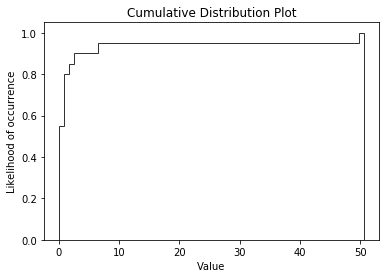

In [19]:
controlB = [0.08, 0.10, 0.15, 0.17, 0.24, 0.34, 0.38, 0.42, 0.49, 0.50,
            0.70, 0.94, 0.95, 1.26, 1.37, 1.55, 1.75, 3.20, 6.98, 50.57]
plt.hist(controlB, 'fd', density=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='k')
plt.title('Cumulative Distribution Plot')
plt.xlabel('Value')
plt.ylabel('Likelihood of occurrence')

<b>2. Cumulative distribution plot with logarithmic values on x axis</b>

Text(0, 0.5, 'Likelihood of occurrence')

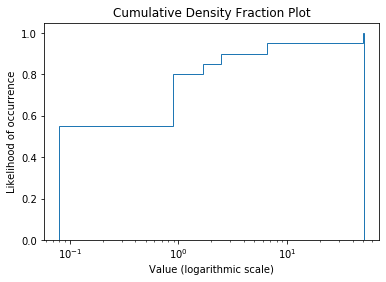

In [20]:
controlB = [0.08, 0.10, 0.15, 0.17, 0.24, 0.34, 0.38, 0.42, 0.49, 0.50,
            0.70, 0.94, 0.95, 1.26, 1.37, 1.55, 1.75, 3.20, 6.98, 50.57]
#plt.hist(controlB, density=True, cumulative=True, label='CDF', histtype='step', alpha=0.8, color='k')
plt.hist(controlB, 'fd', density=True, histtype='step',
                           cumulative=True, label='Empirical')
plt.xscale('log')
plt.title('Cumulative Density Fraction Plot')
plt.xlabel('Value (logarithmic scale)')
plt.ylabel('Likelihood of occurrence')

<b>3. Kolmogorov-Smirnov test for two specified samples</b>

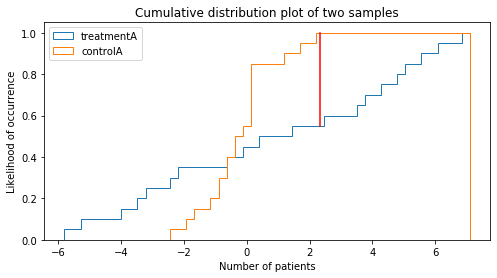

In [21]:
def max_distance_line(axes, cdf_values1, cdf_values2, bins, color='red'):
    ind_max = np.argmax(np.abs(cdf_values1-cdf_values2))
    line = mlines.Line2D([(bins[ind_max+1]+bins[ind_max])/2., 
                           (bins[ind_max+1]+bins[ind_max])/2.],
                          [cdf_values1[ind_max], 
                           cdf_values2[ind_max]], 
                          color=color)
    axes.add_line(line)

controlA = [0.22, -0.87, -2.39, -1.79, 0.37, -1.54, 1.28, -0.31,
-0.74, 1.72, 0.38, -0.17, -0.62 , -1.10, 0.30, 0.15,
2.30, 0.19, -0.50, -0.09]

treatmentA = [-5.13, -2.19, -2.43, -3.83, 0.50, -3.25, 4.32, 1.63,
5.18, -0.43, 7.11, 4.87, -3.10, -5.81, 3.76, 6.31,
2.58, 0.07, 5.76, 3.50]

fig, ax = plt.subplots(figsize=(8, 4))

n, bins, patches = ax.hist(treatmentA, 50, density=True, histtype='step',
                           cumulative=True, label='treatmentA')

n_control, bins_control, patches_control = ax.hist(controlA, bins=bins, density=True, histtype='step',
                           cumulative=True, label='controlA')

ax.legend(loc='upper left')
ax.set_title('Cumulative distribution plot of two samples')
ax.set_xlabel('Number of patients')
ax.set_ylabel('Likelihood of occurrence')

max_distance_line(ax, cdf_values1=n, cdf_values2=n_control, bins=bins, color='red')

In [22]:
stat, p = ks_2samp(treatmentA, controlA)
print('Maximum distance between two cumulative distribution plots: \t {0}'.format(stat))

Maximum distance between two cumulative distribution plots: 	 0.45


<b>4. Checking the simmilarity and normality of the distributions of two samples</b>


H0: both samples are from the same distribution
p-value: 		 0.9920496894409938
Result: 		 p-value is greater than alpha 
 			 We can't reject null hypothesis

=== Women sample stats ===
mean: 			 167.75
standard deviation: 	 5.084699270032267

H0: Women sample distribution comes from gaussian distribution
p-value: 		 0.9575566913754932
Result: 		 p-value is greater than alpha 
 			 We can't reject null hypothesis

=== Men sample stats ===
mean: 			 168.84615384615384
standard deviation: 	 6.371162843338047

H0: Men sample distribution comes from gaussian distribution
p-value: 		 0.9620596323740694
Result: 		 p-value is greater than alpha 
 			 We can't reject null hypothesis


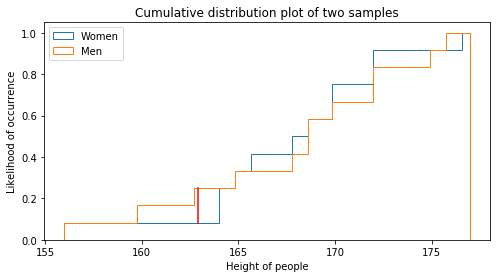

In [23]:
def max_distance_line(axes, cdf_values1, cdf_values2, bins, color='red'):
    ind_max = np.argmax(np.abs(cdf_values1-cdf_values2))
    line = mlines.Line2D([(bins[ind_max+1]+bins[ind_max])/2., 
                           (bins[ind_max+1]+bins[ind_max])/2.],
                          [cdf_values1[ind_max], 
                           cdf_values2[ind_max]], 
                          color=color)
    axes.add_line(line)

df = pandas.read_csv(os.path.join('dane_listy_3_-_5', 'pacjenci.csv'))

df_women = df[df['plec'] == 'K']
df_men = df[df['plec'] == 'M']

stat, p = ks_2samp(sorted(df_women['wzrost']), sorted(df_men['wzrost']))

alpha = 0.05

print('\nH0: both samples are from the same distribution')

print('p-value: \t\t {0}'.format(p))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')

loc, scale = norm.fit(df_women['wzrost'])

print('\n=== Women sample stats ===\nmean: \t\t\t {0}\nstandard deviation: \t {1}'.format(loc, scale))

print('\nH0: Women sample distribution comes from gaussian distribution')

stat, p = kstest(sorted(df_women['wzrost']), 'norm', args=(loc, scale))

print('p-value: \t\t {0}'.format(p))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')    

loc, scale = norm.fit(df_men['wzrost'])

print('\n=== Men sample stats ===\nmean: \t\t\t {0}\nstandard deviation: \t {1}'.format(loc, scale))

print('\nH0: Men sample distribution comes from gaussian distribution')

stat, p = kstest(sorted(df_men['wzrost']), 'norm', args=(loc, scale))

print('p-value: \t\t {0}'.format(p))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')

fig, ax = plt.subplots(figsize=(8, 4))

n, bins, patches = ax.hist(sorted(df_women['wzrost']), 50, density=True, histtype='step',
                           cumulative=True, label='Women')

n_control, bins_control, patches_control = ax.hist(sorted(df_men['wzrost']), bins=bins, density=True, histtype='step',
                           cumulative=True, label='Men')
    
ax.legend(loc='upper left')
ax.set_title('Cumulative distribution plot of two samples')
ax.set_xlabel('Height of people')
ax.set_ylabel('Likelihood of occurrence')

max_distance_line(ax, cdf_values1=n, cdf_values2=n_control, bins=bins, color='red')

In [24]:
# simple example why you should always provide population mean 
# and standard deviation to the K-S test
random_sample = np.random.normal(loc=200, scale=15, size=100)

stat, p = kstest(sorted(random_sample), 'norm')

print('stat value: \t {0}\np-value: \t {1}\n'.format(stat, p))

stat, p = kstest(sorted(random_sample), 'norm', args=(200, 15))

print('stat value: \t {0}\np-value: \t {1}\n'.format(stat, p))

stat value: 	 1.0
p-value: 	 0.0

stat value: 	 0.048255827067079315
p-value: 	 0.9740189241036694



<b>5. Kolmogorov-Smirnov test, ttest and then cumulative fraction plot</b>

In [25]:
delikates = [23.4, 30.9, 18.8, 23.0, 21.4, 1, 24.6, 23.8,
             24.1, 18.7, 16.3, 20.3, 14.9, 35.4,21.6, 21.2,
             21.0, 15.0, 15.6, 24.0, 34.6, 40.9, 30.7, 24.5,
             16.6, 1, 21.7, 1, 23.6, 1, 25.7,19.3, 46.9, 23.3,
             21.8, 33.3, 24.9, 24.4, 1, 19.8, 17.2, 21.5, 25.5,
             23.3, 18.6, 22.0, 29.8,33.3, 1, 21.3, 18.6, 26.8,
             19.4, 21.1, 21.2, 20.5, 19.8, 26.3, 39.3, 21.4,
             22.6, 1, 35.3, 7.0,19.3, 21.3, 10.1, 20.2, 1, 36.2,
             16.7, 21.1, 39.1, 19.9, 32.1, 23.1, 21.8, 30.4, 19.62, 15.5]

renety = [16.5, 1, 22.6, 25.3, 23.7, 1, 23.3, 23.9, 16.2, 23.0,
          21.6, 10.8, 12.2, 23.6, 10.1, 24.4, 16.4, 11.7, 17.7,
          34.3, 24.3, 18.7, 27.5, 25.8, 22.5, 14.2, 21.7, 1, 31.2,
          13.8, 29.7,23.1, 26.1, 25.1, 23.4, 21.7, 24.4, 13.2, 22.1,
          26.7, 22.7, 1, 18.2, 28.7, 29.1, 27.4, 22.3,13.2, 22.5,
          25.0, 1, 6.6, 23.7, 23.5, 17.3, 24.6, 27.8, 29.7, 25.3,
          19.9, 18.2, 26.2, 20.4,23.3, 26.7, 26.0, 1, 25.1, 33.1,
          35.0, 25.3, 23.6, 23.2, 20.2, 24.7, 22.6, 39.1, 26.5, 22.7]

loc, scale = norm.fit(delikates)

print('\n=== \'Delikates\' apple trees sample stats ===\nmean: \t\t\t {0}\nstandard deviation: \t {1}'.format(loc, scale))

print('\nH0: \t\'Delikates\' apple trees sample distribution \n\tcomes from gaussian distribution')

stat, p = kstest(sorted(delikates), 'norm', args=(loc, scale))

alpha = 0.05

print('p-value: \t\t {0}\nalpha: \t\t\t {1}'.format(p, alpha))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')

loc, scale = norm.fit(renety)

print('\n=== \'Reneta\' apple trees sample stats ===\nmean: \t\t\t {0}\nstandard deviation: \t {1}'.format(loc, scale))

print('\nH0: \t\'Reneta\' apple trees sample distribution \n\tcomes from gaussian distribution')

stat, p = kstest(sorted(renety), 'norm', args=(loc, scale))

alpha = 0.05

print('p-value: \t\t {0}\nalpha: \t\t\t {1}'.format(p, alpha))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')


=== 'Delikates' apple trees sample stats ===
mean: 			 21.402749999999997
standard deviation: 	 9.557462918447552

H0: 	'Delikates' apple trees sample distribution 
	comes from gaussian distribution
p-value: 		 0.030053577081661037
alpha: 			 0.05
Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis

=== 'Reneta' apple trees sample stats ===
mean: 			 21.1126582278481
standard deviation: 	 8.062922909541992

H0: 	'Reneta' apple trees sample distribution 
	comes from gaussian distribution
p-value: 		 0.0041704162227314025
alpha: 			 0.05
Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis


In [26]:
delikates = [23.4, 30.9, 18.8, 23.0, 21.4, 1, 24.6, 23.8,
             24.1, 18.7, 16.3, 20.3, 14.9, 35.4,21.6, 21.2,
             21.0, 15.0, 15.6, 24.0, 34.6, 40.9, 30.7, 24.5,
             16.6, 1, 21.7, 1, 23.6, 1, 25.7,19.3, 46.9, 23.3,
             21.8, 33.3, 24.9, 24.4, 1, 19.8, 17.2, 21.5, 25.5,
             23.3, 18.6, 22.0, 29.8,33.3, 1, 21.3, 18.6, 26.8,
             19.4, 21.1, 21.2, 20.5, 19.8, 26.3, 39.3, 21.4,
             22.6, 1, 35.3, 7.0,19.3, 21.3, 10.1, 20.2, 1, 36.2,
             16.7, 21.1, 39.1, 19.9, 32.1, 23.1, 21.8, 30.4, 19.62, 15.5]

renety = [16.5, 1, 22.6, 25.3, 23.7, 1, 23.3, 23.9, 16.2, 23.0,
          21.6, 10.8, 12.2, 23.6, 10.1, 24.4, 16.4, 11.7, 17.7,
          34.3, 24.3, 18.7, 27.5, 25.8, 22.5, 14.2, 21.7, 1, 31.2,
          13.8, 29.7,23.1, 26.1, 25.1, 23.4, 21.7, 24.4, 13.2, 22.1,
          26.7, 22.7, 1, 18.2, 28.7, 29.1, 27.4, 22.3,13.2, 22.5,
          25.0, 1, 6.6, 23.7, 23.5, 17.3, 24.6, 27.8, 29.7, 25.3,
          19.9, 18.2, 26.2, 20.4,23.3, 26.7, 26.0, 1, 25.1, 33.1,
          35.0, 25.3, 23.6, 23.2, 20.2, 24.7, 22.6, 39.1, 26.5, 22.7]

stat, p = ttest_ind(sorted(delikates), sorted(renety))

alpha = 0.05

print('\nH0: \t\t\t both samples\' distribution have the same mean\n')

print('p-value: \t\t {0}\nalpha: \t\t\t {1}\n'.format(p, alpha))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')


H0: 			 both samples' distribution have the same mean

p-value: 		 0.8374982961075321
alpha: 			 0.05

Result: 		 p-value is greater than alpha 
 			 We can't reject null hypothesis


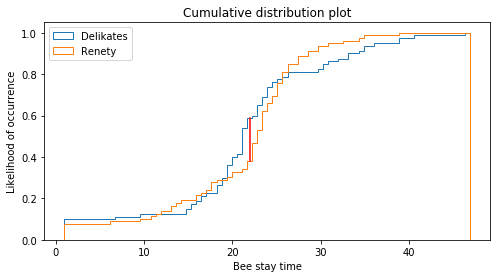

In [27]:
# Comparison Cumulative Fraction Plot
def max_distance_line(axes, cdf_values1, cdf_values2, bins, color='red'):
    ind_max = np.argmax(np.abs(cdf_values1-cdf_values2))
    line = mlines.Line2D([(bins[ind_max+1]+bins[ind_max])/2., 
                           (bins[ind_max+1]+bins[ind_max])/2.],
                          [cdf_values1[ind_max], 
                           cdf_values2[ind_max]], 
                          color=color)
    axes.add_line(line)

delikates = [23.4, 30.9, 18.8, 23.0, 21.4, 1, 24.6, 23.8,
             24.1, 18.7, 16.3, 20.3, 14.9, 35.4,21.6, 21.2,
             21.0, 15.0, 15.6, 24.0, 34.6, 40.9, 30.7, 24.5,
             16.6, 1, 21.7, 1, 23.6, 1, 25.7,19.3, 46.9, 23.3,
             21.8, 33.3, 24.9, 24.4, 1, 19.8, 17.2, 21.5, 25.5,
             23.3, 18.6, 22.0, 29.8,33.3, 1, 21.3, 18.6, 26.8,
             19.4, 21.1, 21.2, 20.5, 19.8, 26.3, 39.3, 21.4,
             22.6, 1, 35.3, 7.0, 19.3, 21.3, 10.1, 20.2, 1, 36.2,
             16.7, 21.1, 39.1, 19.9, 32.1, 23.1, 21.8, 30.4, 19.62, 15.5]

renety = [16.5, 1, 22.6, 25.3, 23.7, 1, 23.3, 23.9, 16.2, 23.0,
          21.6, 10.8, 12.2, 23.6, 10.1, 24.4, 16.4, 11.7, 17.7,
          34.3, 24.3, 18.7, 27.5, 25.8, 22.5, 14.2, 21.7, 1, 31.2,
          13.8, 29.7,23.1, 26.1, 25.1, 23.4, 21.7, 24.4, 13.2, 22.1,
          26.7, 22.7, 1, 18.2, 28.7, 29.1, 27.4, 22.3,13.2, 22.5,
          25.0, 1, 6.6, 23.7, 23.5, 17.3, 24.6, 27.8, 29.7, 25.3,
          19.9, 18.2, 26.2, 20.4,23.3, 26.7, 26.0, 1, 25.1, 33.1,
          35.0, 25.3, 23.6, 23.2, 20.2, 24.7, 22.6, 39.1, 26.5, 22.7]

fig, ax = plt.subplots(figsize=(8, 4))

n, bins, patches = ax.hist(delikates, 80, density=True, histtype='step',
                           cumulative=True, label='Delikates')

n_control, bins_control, patches_control = ax.hist(renety, bins=bins, density=True, histtype='step',
                           cumulative=True, label='Renety')

ax.legend(loc='upper left')
ax.set_title('Cumulative distribution plot')
ax.set_xlabel('Bee stay time')
ax.set_ylabel('Likelihood of occurrence')

max_distance_line(ax, cdf_values1=n, cdf_values2=n_control, bins=bins, color='red')

In [34]:
delikates = [23.4, 30.9, 18.8, 23.0, 21.4, 1, 24.6, 23.8,
             24.1, 18.7, 16.3, 20.3, 14.9, 35.4,21.6, 21.2,
             21.0, 15.0, 15.6, 24.0, 34.6, 40.9, 30.7, 24.5,
             16.6, 1, 21.7, 1, 23.6, 1, 25.7,19.3, 46.9, 23.3,
             21.8, 33.3, 24.9, 24.4, 1, 19.8, 17.2, 21.5, 25.5,
             23.3, 18.6, 22.0, 29.8,33.3, 1, 21.3, 18.6, 26.8,
             19.4, 21.1, 21.2, 20.5, 19.8, 26.3, 39.3, 21.4,
             22.6, 1, 35.3, 7.0, 19.3, 21.3, 10.1, 20.2, 1, 36.2,
             16.7, 21.1, 39.1, 19.9, 32.1, 23.1, 21.8, 30.4, 19.62, 15.5]

renety = [16.5, 1, 22.6, 25.3, 23.7, 1, 23.3, 23.9, 16.2, 23.0,
          21.6, 10.8, 12.2, 23.6, 10.1, 24.4, 16.4, 11.7, 17.7,
          34.3, 24.3, 18.7, 27.5, 25.8, 22.5, 14.2, 21.7, 1, 31.2,
          13.8, 29.7,23.1, 26.1, 25.1, 23.4, 21.7, 24.4, 13.2, 22.1,
          26.7, 22.7, 1, 18.2, 28.7, 29.1, 27.4, 22.3,13.2, 22.5,
          25.0, 1, 6.6, 23.7, 23.5, 17.3, 24.6, 27.8, 29.7, 25.3,
          19.9, 18.2, 26.2, 20.4,23.3, 26.7, 26.0, 1, 25.1, 33.1,
          35.0, 25.3, 23.6, 23.2, 20.2, 24.7, 22.6, 39.1, 26.5, 22.7]

stat, p = ks_2samp(sorted(delikates), sorted(renety))

alpha = 0.05

print('\nH0: \t\t\t both samples\' come from the same distribution\n')

print('p-value: \t\t {0}\nalpha: \t\t\t {1}\n'.format(p, alpha))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')


H0: 			 both samples' come from the same distribution

p-value: 		 0.03385688806282727
alpha: 			 0.05

Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis


<b>6. Comparison of Kolmogorov-Smirnov test results and Lilliefors test results for samples from population with unknown mean and std deviation</b>

In [28]:
df = pandas.read_csv(os.path.join('dane_listy_3_-_5', 'pacjenci.csv'))

df_women = df[df['plec'] == 'K']
df_men = df[df['plec'] == 'M']

# women sample testing

loc, scale = norm.fit(df_women['wzrost'])

print('=== Women sample stats ===\nmean: \t\t\t {0}\nstandard deviation: \t {1}\n'.format(loc, scale))

alpha = 0.05

print('=== Kolmogorov-Smirnov test results ===\n')

print('H0: Women sample distribution comes from gaussian distribution\n')

stat, p = kstest(sorted(df_women['wzrost']), 'norm', args=(loc, scale))

print('p-value: \t\t {0}\nalpha: \t\t\t {1}'.format(p, alpha))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')    

print('\n=== Lilliefors test results ===\n')

print('H0: Women sample comes from gaussian distribution\n')

stat, p = sm.stats.lilliefors(sorted(df_women['wzrost']))

print('p-value: \t\t {0}\nalpha: \t\t\t {1}'.format(p, alpha))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')    

# men sample testing

loc, scale = norm.fit(df_men['wzrost'])

print('\n=== Men sample stats ===\nmean: \t\t\t {0}\nstandard deviation: \t {1}\n'.format(loc, scale))

alpha = 0.05

print('=== Kolmogorov-Smirnov test results ===\n')

print('H0: Men sample comes from a gaussian distribution\n')

stat, p = kstest(sorted(df_men['wzrost']), 'norm', args=(loc, scale))

print('p-value: \t\t {0}\nalpha: \t\t\t {1}'.format(p, alpha))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')    

print('\n=== Lilliefors test results ===\n')

print('H0: Men sample distribution comes from a gaussian distribution\n')

stat, p = sm.stats.lilliefors(sorted(df_men['wzrost']))

print('p-value: \t\t {0}\nalpha: \t\t\t {1}'.format(p, alpha))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')    



=== Women sample stats ===
mean: 			 167.75
standard deviation: 	 5.084699270032267

=== Kolmogorov-Smirnov test results ===

H0: Women sample distribution comes from gaussian distribution

p-value: 		 0.9575566913754932
alpha: 			 0.05
Result: 		 p-value is greater than alpha 
 			 We can't reject null hypothesis

=== Lilliefors test results ===

H0: Women sample comes from gaussian distribution

p-value: 		 0.2
alpha: 			 0.05
Result: 		 p-value is greater than alpha 
 			 We can't reject null hypothesis

=== Men sample stats ===
mean: 			 168.84615384615384
standard deviation: 	 6.371162843338047

=== Kolmogorov-Smirnov test results ===

H0: Men sample comes from a gaussian distribution

p-value: 		 0.9620596323740694
alpha: 			 0.05
Result: 		 p-value is greater than alpha 
 			 We can't reject null hypothesis

=== Lilliefors test results ===

H0: Men sample distribution comes from a gaussian distribution

p-value: 		 0.2
alpha: 			 0.05
Result: 		 p-value is greater than alpha 
 	

<b>7. Shapiro-Wilk normality test example</b>

=== Shapiro-Wilk test results ===

H0: Sample distribution comes from gaussian distribution

p-value: 		 0.3770618736743927
alpha: 			 0.05
Result: 		 p-value is greater than alpha 
 			 We can't reject null hypothesis


Text(0.5, 1.0, 'Q-Q plot for gaussian distribution')

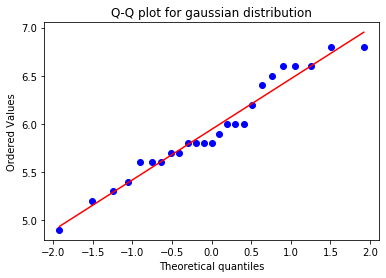

In [29]:
df = pandas.read_csv(os.path.join('dane_listy_3_-_5', 'pacjenci.csv'))

print('=== Shapiro-Wilk test results ===\n')

print('H0: Sample distribution comes from gaussian distribution\n')

stat, p = shapiro(sorted(df['cukier']))

alpha = 0.05

print('p-value: \t\t {0}\nalpha: \t\t\t {1}'.format(p, alpha))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')    

fig = plt.figure()
ax = fig.add_subplot(111)
res = probplot(df['cukier'], dist=norm, plot=ax)
ax.set_title('Q-Q plot for gaussian distribution')

<b>8. Shapiro-Wilk normality test example on small sample (n = 10) with alpha = 0.1</b>

=== Shapiro-Wilk test results ===

H0: Sample distribution comes from gaussian distribution

p-value: 		 0.18165215849876404
alpha: 			 0.1
Result: 		 p-value is greater than alpha 
 			 We can't reject null hypothesis


Text(0.5, 1.0, 'Q-Q plot for gaussian distribution')

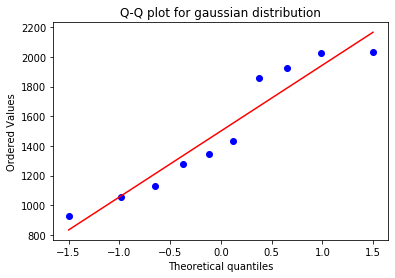

In [36]:
df = pandas.read_csv(os.path.join('dane_listy_3_-_5', 'zarowki.csv'))

print('=== Shapiro-Wilk test results ===\n')

print('H0: Sample distribution comes from gaussian distribution\n')

stat, p = shapiro(sorted(df['czas']))

alpha = 0.1

print('p-value: \t\t {0}\nalpha: \t\t\t {1}'.format(p, alpha))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')    

fig = plt.figure()
ax = fig.add_subplot(111)
res = probplot(df['czas'], dist=norm, plot=ax)
ax.set_title('Q-Q plot for gaussian distribution')

<b>9. Shapiro-Wilk normality test example with alpha = 0.05</b>

=== Shapiro-Wilk test results ===

H0: Sample distribution comes from gaussian distribution

p-value: 		 0.25765126943588257
alpha: 			 0.05
Result: 		 p-value is greater than alpha 
 			 We can't reject null hypothesis


Text(0.5, 1.0, 'Q-Q plot for gaussian distribution')

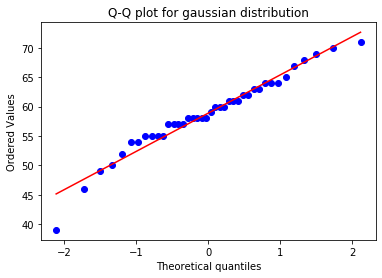

In [31]:
df = pandas.read_csv(os.path.join('dane_listy_3_-_5', 'kondensatory.csv'))

print('=== Shapiro-Wilk test results ===\n')

print('H0: Sample distribution comes from gaussian distribution\n')

stat, p = shapiro(sorted(df['pojemnosc']))

alpha = 0.05

print('p-value: \t\t {0}\nalpha: \t\t\t {1}'.format(p, alpha))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')    

fig = plt.figure()
ax = fig.add_subplot(111)
res = probplot(df['pojemnosc'], dist=norm, plot=ax)
ax.set_title('Q-Q plot for gaussian distribution')

<b>10. Choose right normality test for specified data (Shapiro-Wilk test, because Kolmogorov-Smirnov and Anderson-Darling requires known population mean and standard deviation, Shapiro-Wilk is said by the SciPy library documentation to be best for samples with less than 5000 values and it's often said, that it gives better results than Lilliefors test)</b>

=== Shapiro-Wilk test for agriculture graduates' salaries results ===

H0: Sample distribution comes from gaussian distribution

p-value: 		 1.221013401497828e-09
alpha: 			 0.05
Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis

=== Shapiro-Wilk test for education graduates' salaries results ===

H0: Sample distribution comes from gaussian distribution

p-value: 		 0.1522388756275177
alpha: 			 0.05
Result: 		 p-value is greater than alpha 
 			 We can't reject null hypothesis


Text(0.5, 1.0, 'Q-Q plot for gaussian distribution (education)')

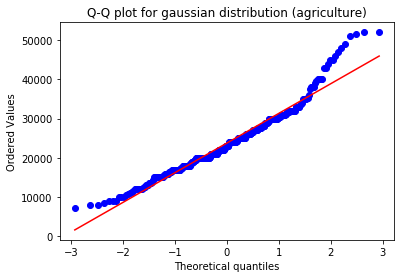

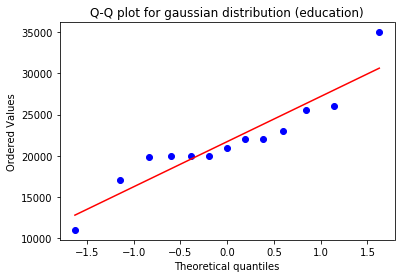

In [39]:
df = pandas.read_csv(os.path.join('dane_listy_3_-_5', 'absolwenci.csv'), sep=';', engine='python')

df_agriculture = df[df['COLLEGE'] == 'Rolnictwo']

df_education = df[df['COLLEGE'] == 'Pedagogika']

print('=== Shapiro-Wilk test for agriculture graduates\' salaries results ===\n')

print('H0: Sample distribution comes from gaussian distribution\n')

stat, p = shapiro(df_agriculture['SALARY'])

alpha = 0.05

print('p-value: \t\t {0}\nalpha: \t\t\t {1}'.format(p, alpha))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')    

fig = plt.figure()
ax = fig.add_subplot(111)
res = probplot(sorted(df_agriculture['SALARY']), dist=norm, plot=ax)
ax.set_title('Q-Q plot for gaussian distribution (agriculture)')

print('\n=== Shapiro-Wilk test for education graduates\' salaries results ===\n')

print('H0: Sample distribution comes from gaussian distribution\n')

stat, p = shapiro(df_education['SALARY'])

alpha = 0.05

print('p-value: \t\t {0}\nalpha: \t\t\t {1}'.format(p, alpha))

if p <= alpha:
    print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
else:
    print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')    

fig = plt.figure()
ax = fig.add_subplot(111)
res = probplot(sorted(df_education['SALARY']), dist=norm, plot=ax)
ax.set_title('Q-Q plot for gaussian distribution (education)')